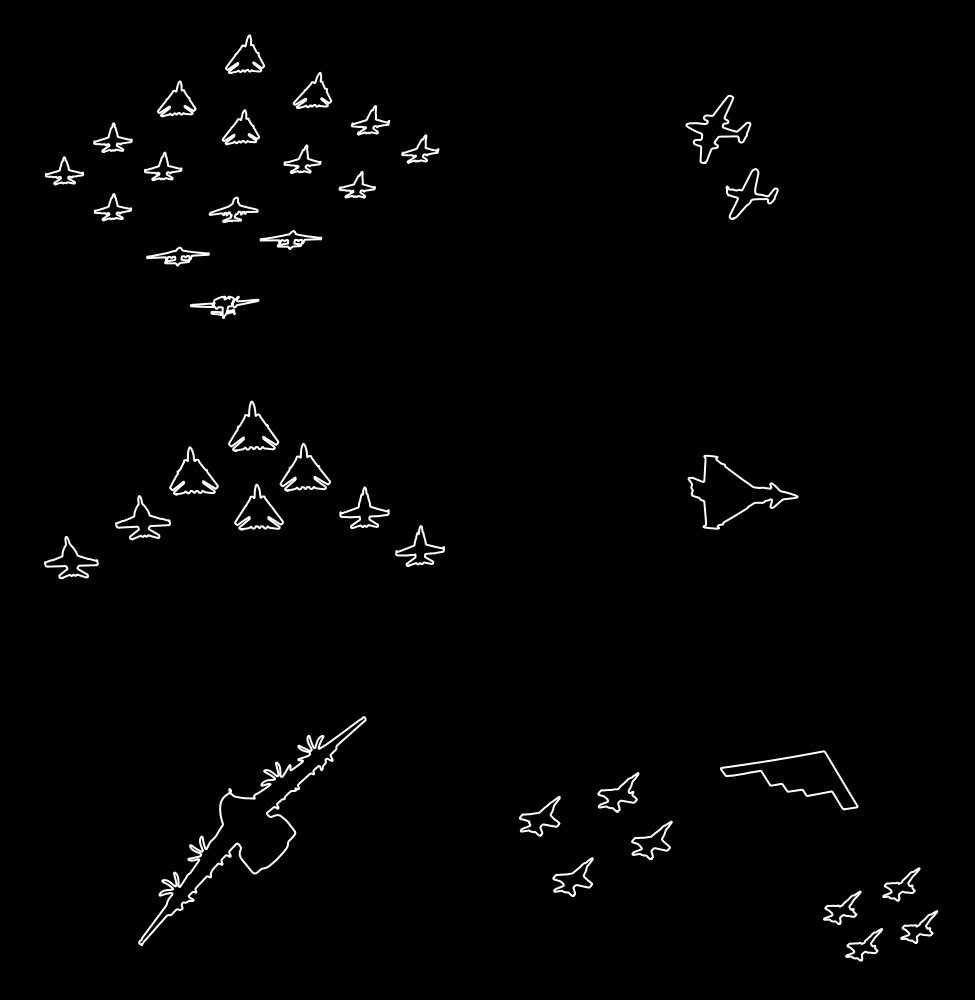

In [1]:
from skimage import io, filters, measure
import scipy
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
import numpy as np
    

def drawContours(images, columns, rows):
    fig = plt.figure(figsize=(14, 14), facecolor="black")
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1)
        plt.axis('off')
        img = io.imread(images[i])
        img = rgb2gray(img)
        
        # noise reduction
        img = scipy.ndimage.gaussian_filter(img, sigma=1.5)
        # background
        io.imshow(np.zeros([len(img), len(img[0])]))
        # contours
        thresh = threshold_otsu(img)
        contours = measure.find_contours(img, thresh)
        for n, contour in enumerate(contours):
            plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color="white")
        
    plt.tight_layout()
    plt.show()
    fig.savefig("samoloty.pdf")
    plt.close()


if __name__ == '__main__':
    columns = 2
    rows = 3
    path = '4. Dane do zadania-20211108'
    images = [path + '/samolot' + f'{i:02d}' + '.jpg' for i in [0, 1, 5, 8, 11, 16]]
#     images = [path + '/samolot' + f'{i:02d}' + '.jpg' for i in range(7, 7+columns*rows)]

    
    drawContours(images, columns, rows)
